In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
from typing import Any
import requests as req
import functools
import pandas as pd
import numpy as np
import tqdm
# from Bio import SeqUtils
import logomaker as lm
from logomaker import Glyph
import itertools

# Baselines

![](Bild.png) ![](Bild1.png) 

# Aggregate deltas
delta = reference prediction - masked prediction

In [6]:
res_elim = pd.read_csv('res_elim_85.csv', index_col=False)#.drop(columns=['Unnamed: 0'])
ids = res_elim.groupby('activities.activity_id').count()
res_elim = res_elim[res_elim['activities.activity_id'].isin(ids[ids['masked_pred'] == 85].index.values)]

In [115]:
res_elim = pd.read_csv('res_elim_new.csv', index_col=False)

In [116]:
df = pd.read_csv('../data/snack_box.csv')
df.head()

,ident,masked_residue,masked_pred,compound_structures.canonical_smiles,docking.chemgauss_score,similar.klifs_structure_id,similar.fp_similarity,activities.activity_id,UniprotID,docking.posit_probability,docking.predicted_rmsd
0,44494,72,5.676785,Nc1n[nH]c2nc(-c3ccc(NS(=O)(=O)c4cc(Cl)ccc4Cl)c...,-11.868353,14012,0.271318,13852678,O00141,0.78,1.382647
1,44494,71,5.657371,Nc1n[nH]c2nc(-c3ccc(NS(=O)(=O)c4cc(Cl)ccc4Cl)c...,-11.868353,14012,0.271318,13852678,O00141,0.78,1.382647
2,44494,60,5.628484,Nc1n[nH]c2nc(-c3ccc(NS(=O)(=O)c4cc(Cl)ccc4Cl)c...,-11.868353,14012,0.271318,13852678,O00141,0.78,1.382647
3,44494,61,5.688464,Nc1n[nH]c2nc(-c3ccc(NS(=O)(=O)c4cc(Cl)ccc4Cl)c...,-11.868353,14012,0.271318,13852678,O00141,0.78,1.382647
4,44494,25,5.675944,Nc1n[nH]c2nc(-c3ccc(NS(=O)(=O)c4cc(Cl)ccc4Cl)c...,-11.868353,14012,0.271318,13852678,O00141,0.78,1.382647


In [117]:
# res_elim['rescode'] = [SeqUtils.IUPACData.protein_letters_3to1[a + b] for a, b in zip(res_elim['resname'].str[0].values, res_elim['resname'].str.lower().str[1:].values)]

In [118]:
# res_elim.to_csv('res_elim_85.csv', index=False)

## Deltas over residue positions

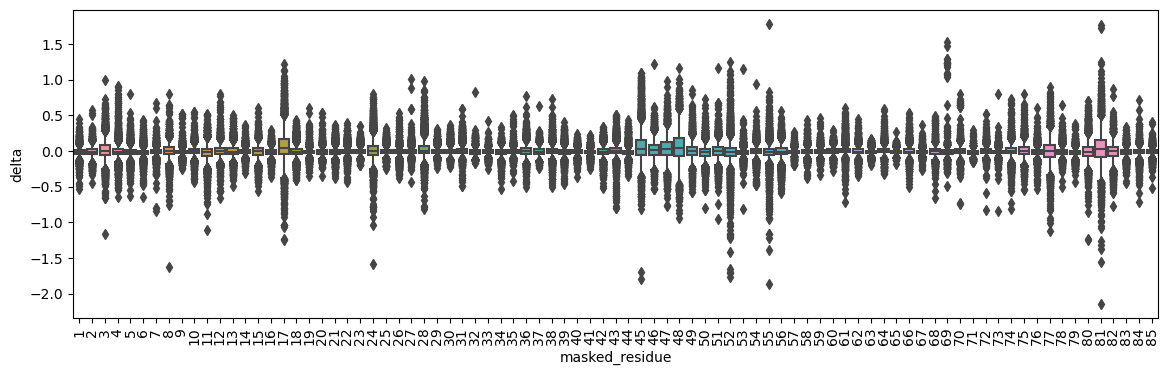

In [119]:
plt.figure(figsize=(14,4))
sns.boxplot(data=res_elim, y='delta', x='masked_residue')
plt.xticks(rotation=90);

## Deltas over residue type

![](residue_interactions.png)

__TODO__: Try finding these effects in the residue masking data?

![](hydogenbonds.png)

In [120]:
sns.boxplot(res_elim, y='delta', x='resname')
plt.xticks(rotation=90);

ValueError: Could not interpret input 'resname'

In [12]:
res_elim

,activities.activity_id,masked_residue,ident,masked_pred,docking.posit_probability,docking.chemgauss_score,compound_structures.canonical_smiles,UniprotID,similar.klifs_structure_id,similar.fp_similarity,...,min_ligand_dist,resname,plausible_hbond,class_prediction,salt_bridge_17_24,DFG,ac_helix,rescode,plip,klifs_count
0,37510,1,10,6.386223,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,10.004122,LYS,False,NaN,3.075019,in,in,K,NaN,0
1,37510,2,10,6.424472,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,8.431673,VAL,False,NaN,3.075019,in,in,V,NaN,0
2,37510,3,10,6.444163,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,4.312520,LEU,True,NaN,3.075019,in,in,L,NaN,1
3,37510,4,10,6.312968,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,5.059357,GLY,False,NaN,3.075019,in,in,G,NaN,1
4,37510,5,10,6.376045,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,7.805556,SER,False,NaN,3.075019,in,in,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209945,24959109,81,119632,8.198071,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,3.676201,ASP,False,NaN,3.249312,in,in,D,NaN,1
209946,24959109,82,119632,8.138313,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,7.206751,PHE,False,NaN,3.249312,in,in,F,NaN,0
209947,24959109,83,119632,8.060630,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,8.414133,GLY,False,NaN,3.249312,in,in,G,NaN,0
209948,24959109,84,119632,8.039929,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,10.705296,LEU,False,NaN,3.249312,in,in,L,NaN,0


In [13]:
res_vars = res_elim.groupby(['masked_residue', 'rescode'])[['delta', 'klifs_count']].agg(['mean', 'count', 'var']).fillna(0)

In [14]:
res_counts = res_vars.pivot_table(index='masked_residue', columns='rescode').fillna(0)

In [15]:
@functools.cache
def klifs_ifp_cat():
    resp = req.get('https://klifs.net/api_v2/interactions_get_types')
    resp.raise_for_status()
    return {int(entry['position']) - 1: entry['name'] for entry in resp.json()}

In [16]:
@functools.cache
def klifs_ifp(structure_id):
    resp = req.get("https://klifs.net/api/interactions_get_IFP", params=dict(structure_ID=structure_id))
    resp.raise_for_status()
    return resp.json()[0]["IFP"]

In [17]:
@functools.cache
def klifs_ifp_count(structure_id):
    return np.array([int(sum(x != '0' for x in xs)) for xs in (itertools.batched(klifs_ifp(structure_id), 7))])

def klifs_ifp_numpy(structure_id):
    ifp = klifs_ifp(structure_id)
    return np.array([int(x) for x in ifp])

In [18]:
res_elim

,activities.activity_id,masked_residue,ident,masked_pred,docking.posit_probability,docking.chemgauss_score,compound_structures.canonical_smiles,UniprotID,similar.klifs_structure_id,similar.fp_similarity,...,min_ligand_dist,resname,plausible_hbond,class_prediction,salt_bridge_17_24,DFG,ac_helix,rescode,plip,klifs_count
0,37510,1,10,6.386223,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,10.004122,LYS,False,NaN,3.075019,in,in,K,NaN,0
1,37510,2,10,6.424472,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,8.431673,VAL,False,NaN,3.075019,in,in,V,NaN,0
2,37510,3,10,6.444163,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,4.312520,LEU,True,NaN,3.075019,in,in,L,NaN,1
3,37510,4,10,6.312968,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,5.059357,GLY,False,NaN,3.075019,in,in,G,NaN,1
4,37510,5,10,6.376045,0.75,-8.021307,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,P00533,786,0.222222,...,7.805556,SER,False,NaN,3.075019,in,in,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209945,24959109,81,119632,8.198071,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,3.676201,ASP,False,NaN,3.249312,in,in,D,NaN,1
209946,24959109,82,119632,8.138313,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,7.206751,PHE,False,NaN,3.249312,in,in,F,NaN,0
209947,24959109,83,119632,8.060630,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,8.414133,GLY,False,NaN,3.249312,in,in,G,NaN,0
209948,24959109,84,119632,8.039929,0.89,-11.374295,CCCCOc1ncnc2[nH]c(-c3ccc(N4CCN(C)CC4)cc3)c(-c3...,P00533,11728,0.805825,...,10.705296,LEU,False,NaN,3.249312,in,in,L,NaN,0


In [19]:
# klifs_counts = [klifs_ifp_count(row['similar.klifs_structure_id'])[row['masked_residue'] - 1] for i, row in tqdm.tqdm(res_elim.iterrows(), total=len(res_elim))]

In [20]:
# res_elim['klifs_count'] = klifs_counts

In [21]:
# res_elim.to_csv('res_elim_85.csv', index=False)

In [27]:
klifs_all = np.sum([klifs_ifp_numpy(x) for x in tqdm.tqdm(res_elim['similar.klifs_structure_id'])], 0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209950/209950 [01:04<00:00, 3264.47it/s]


In [30]:
interactions = {'residue': list(), 'interaction type': list(), "count": list()}
for i in range(0, len(klifs_all), 7):#enumerate(itertools.batched(klifs_all, 7), 1):
    bvec = klifs_all[i:i+7]
    for j, count in enumerate(bvec):
        interactions['residue'].append(i)
        interactions['interaction type'].append(klifs_ifp_cat()[j])
        interactions['count'].append(count)
klifs_interactions = pd.DataFrame(interactions)

In [31]:
# klifs_hist = sum(klifs_ifp(struc) for struc in tqdm.tqdm(res_elim['similar.klifs_structure_id']))

In [39]:
# sum interactions
klifs_hist = np.array([ 11135,   1530, 212840, 139315,  65620,  53040,   7905,  53125,
        19295,  15640, 204850,      0,   1445,    255, 207315,  40630,
       229160,   1530,  11645,   1445,   4675,      0,   1190,  62050,
         8500,      0,  15895,  66895,    425,      0,  21760,      0,
            0,      0,  22525, 161925,  10455,  24310,      0,      0,
            0,      0,  74800,  22780, 220405, 171275, 299115, 446845,
        93755,  62305, 145860, 129625,      0,   4590,  59415,   4080,
            0,      0,   3145,     85,  21760,      0,      0,     85,
            0,  20230,   7735,  27285,   5100,   5610,      0,   2210,
            0,  62900,  48025,   2805, 216070,      0,  19295, 176205,
       258740, 106845,  15895,  30855,  14535])
# interaction present
# klifs_hist = np.array([  8500,   1530, 202215, 139060,  65110,  53040,   7735,  37485,
#         19295,  15640, 204850,      0,   1105,    255, 207315,  40630,
#        182240,   1530,  11645,   1445,   4335,      0,   1190,  45645,
#          8500,      0,  15895,  66895,    425,      0,  19210,      0,
#             0,      0,  22525, 160055,  10455,  22440,      0,      0,
#             0,      0,  74800,  22780, 196860, 168385, 197030, 201960,
#         93160,  61965, 145860, 109565,      0,   4505,  45135,   4080,
#             0,      0,   1870,     85,  21760,      0,      0,     85,
#             0,  15045,   4250,  23205,   5100,   5610,      0,   1445,
#             0,  53040,  46410,   2805, 205955,      0,  19295, 171615,
#        170510,  58565,  10795,  26945,  13685])

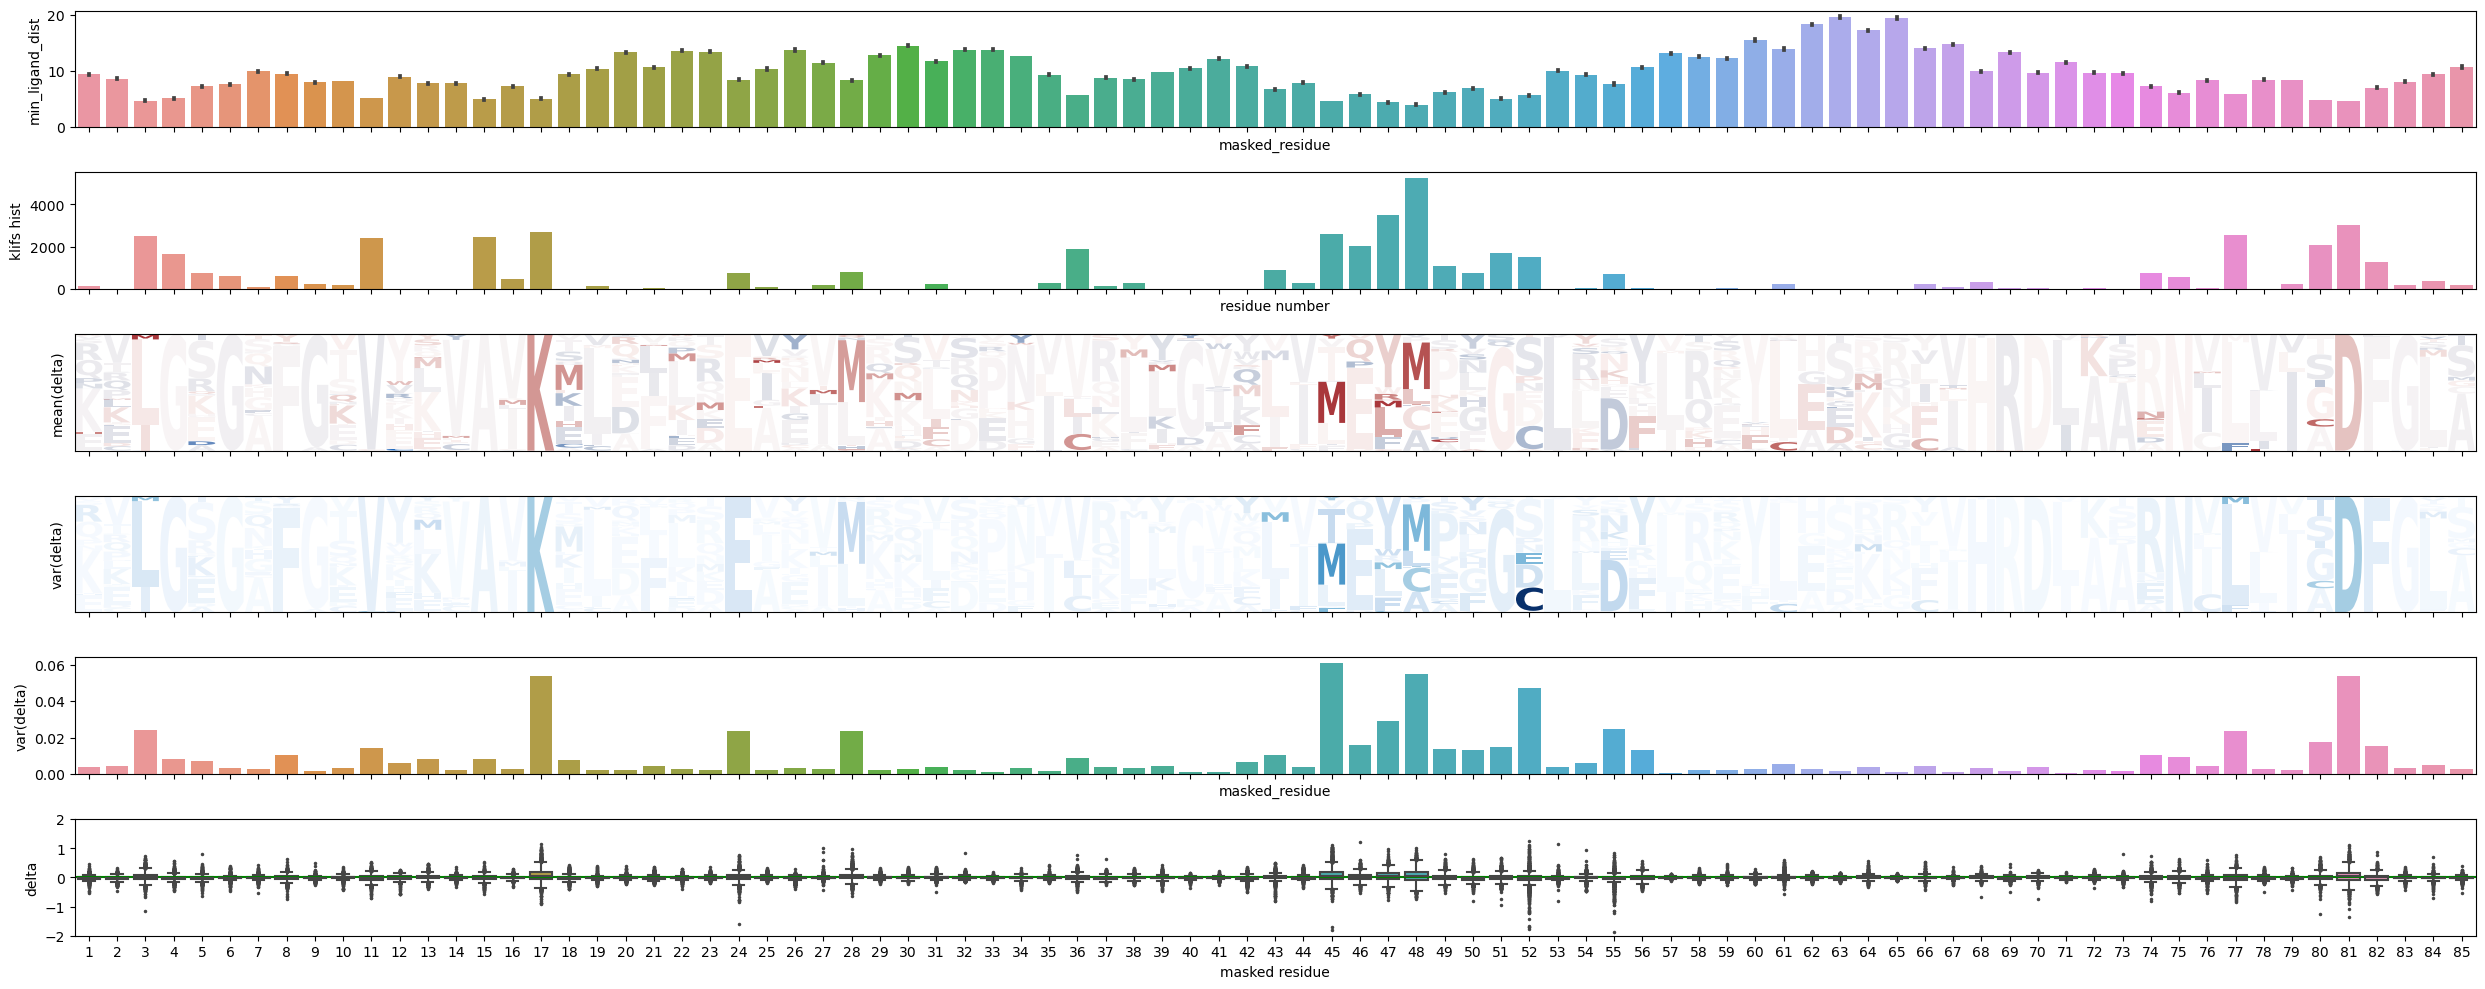

In [40]:
fig, (aaax, aax, ax0, ax, ax1, ax2) = plt.subplots(figsize=(25, 10), nrows=6, sharey=False, sharex=True)


sns.barplot(res_elim.groupby('masked_residue')[['delta']].var().reset_index(), x='masked_residue', y='delta', ax=ax1)
ax1.set_ylabel('var(delta)')

sns.barplot(res_elim, x='masked_residue', y='min_ligand_dist', ax=aaax)

sns.barplot(pd.DataFrame({'klifs hist': klifs_hist / 85, 'residue number': range(1,86)}), x='residue number', y='klifs hist', ax=aax)
# klifs_interactions.pivot_table(index='residue', columns='interaction type', values='count').plot(kind='bar', stacked=True, ax=aax,legend=False)
# plt.legend(title='Interaction Types')


sns.boxplot(data=res_elim, y='delta', x='masked_residue', ax=ax2, flierprops=dict(marker='.', markersize=3))
ax2.plot([-.5,86], [0,0], c='g')
max_var = res_counts['delta', 'var'].max().max()

# max_cnt = res_counts['klifs_count', 'count'].max().max()
# cp = sns.color_palette("Blues", as_cmap=True)
# for position, values in res_counts.iterrows():
#     rescodes = res_counts['delta', 'count'].columns
#     cnt = values['delta', 'count'].sum()
#     floor = 0
#     for rescode in rescodes:
#         height = values['delta', 'count'][rescode] / cnt
#         if height == 0:
#             continue
#         color = cp(values['klifs_count', 'count'][rescode] / max_cnt)[:3]
#         Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=axk, color=color)
#         floor += height
# axk.set_xlim(-0.5, 84.5)
# axk.set_xticks([]); ax.set_yticks([])
# axk.set_ylabel('#KLIFS')

cp = sns.color_palette('vlag', as_cmap=True)#, sep=50, center='light')
max_mean = res_counts['delta', 'mean'].abs().max().max()
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'mean'][rescode] / max_mean  + 0.5)[:3]
        Glyph(c=rescode, p=position-1, ceiling=floor+height, floor=floor, ax=ax0, color=color)
        floor += height
ax0.set_xlim(-0.5, 84.5)
ax0.set_xticks([]); ax0.set_yticks([])
ax0.set_ylabel('mean(delta)')

cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'var'][rescode] / max_var)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=ax, color=color)
        floor += height
ax.set_xlim(-0.5, 84.5)
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('var(delta)')

ax2.set_ylim(-2,2)
ax2.set_xlabel('masked residue')
plt.xticks(np.arange(85));
plt.tight_layout()

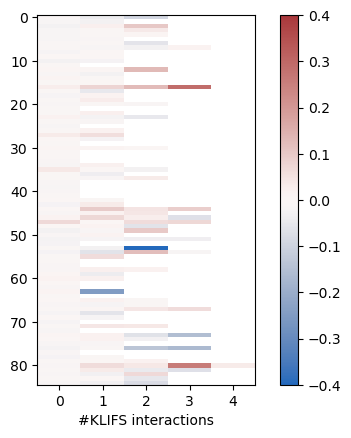

In [41]:
data = res_elim.pivot_table(index=['masked_residue'], columns='klifs_count', values='delta')
plt.imshow(data, aspect=.1, vmin=-0.4, vmax=0.4, cmap=sns.color_palette('vlag', as_cmap=True))
plt.colorbar(); plt.xlabel('#KLIFS interactions')
plt.xticks([0,1,2,3,4]);
# plt.yticks(range(len(data)), data.index);

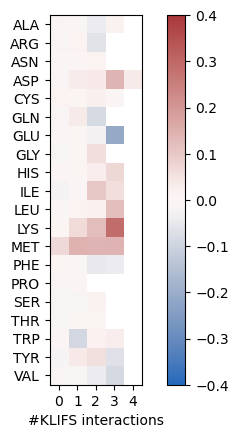

In [42]:
data = res_elim.pivot_table(index=['resname'], columns='klifs_count', values='delta')
plt.imshow(data, aspect=1, vmin=-0.4, vmax=0.4, cmap=sns.color_palette('vlag', as_cmap=True))
plt.colorbar(); plt.xlabel('#KLIFS interactions')
plt.xticks([0,1,2,3,4])
plt.yticks(range(len(data)), data.index);

# Split by (non-)active

Split the data into actives and non-actives by thresholding.

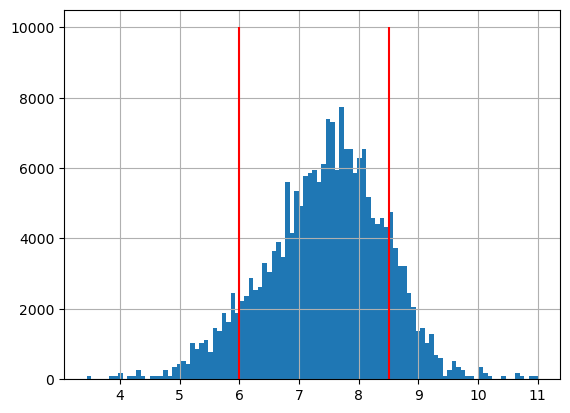

In [43]:
res_elim['reference_pred'].hist(bins=100)
plt.vlines([6,8.5], 0, 10000, color='r')

In [44]:
res_elim.loc[res_elim['reference_pred'] < 6, 'class_prediction'] = 'less active'

In [45]:
res_elim.loc[res_elim['reference_pred'] > 8.5, 'class_prediction'] = 'more active'

In [46]:
res_elim_split = res_elim[~res_elim['class_prediction'].isna()]

## Trends across residue positions

<Figure size 1000x400 with 0 Axes>

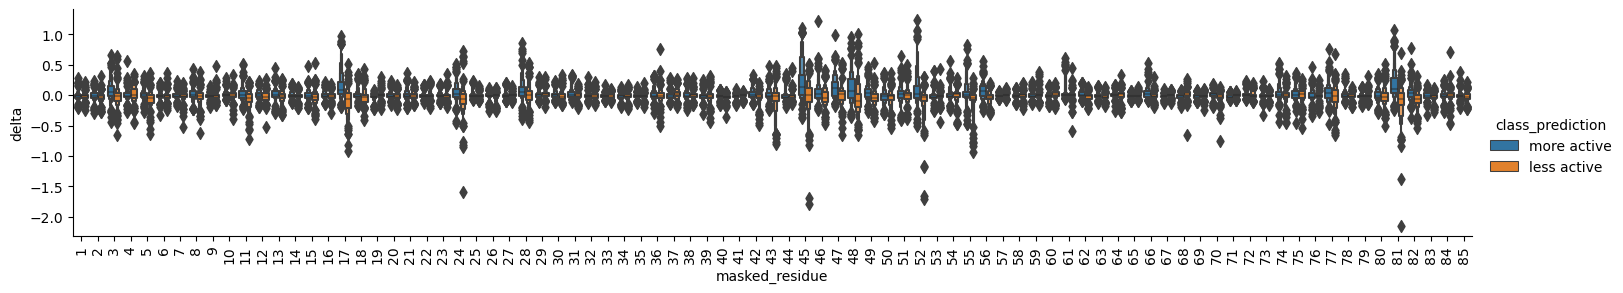

In [47]:
plt.figure(figsize=(10, 4))
sns.catplot(res_elim_split, y='delta', x='masked_residue', hue='class_prediction', kind='boxen', sharey=True, height=3, aspect=5)
plt.xticks(rotation=90);Unnamed: 0

### Variance across positions

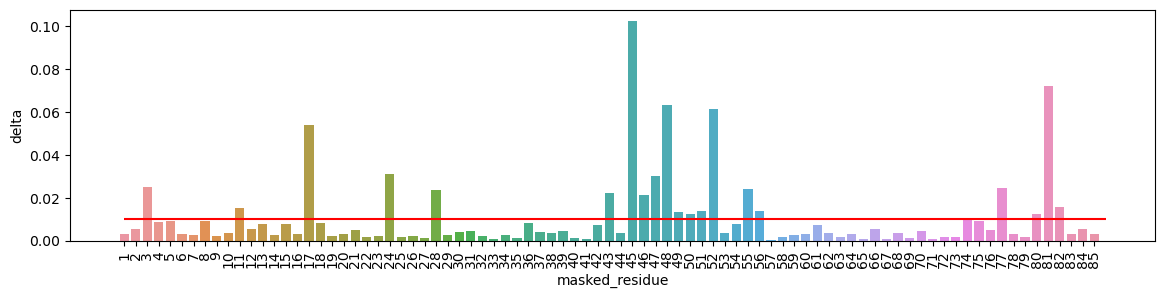

In [109]:
plt.figure(figsize=(14, 3))
sns.barplot(res_elim_split.groupby('masked_residue')[['delta']].var().reset_index(), x='masked_residue', y='delta')
plt.xticks(rotation=90)
threshold = 0.01
dd = res_elim_split.groupby('masked_residue')[['delta']].var() > threshold
important_residues = dd[dd['delta']].index.values
plt.hlines([threshold], 0, 85, color='r')

<Figure size 1000x400 with 0 Axes>

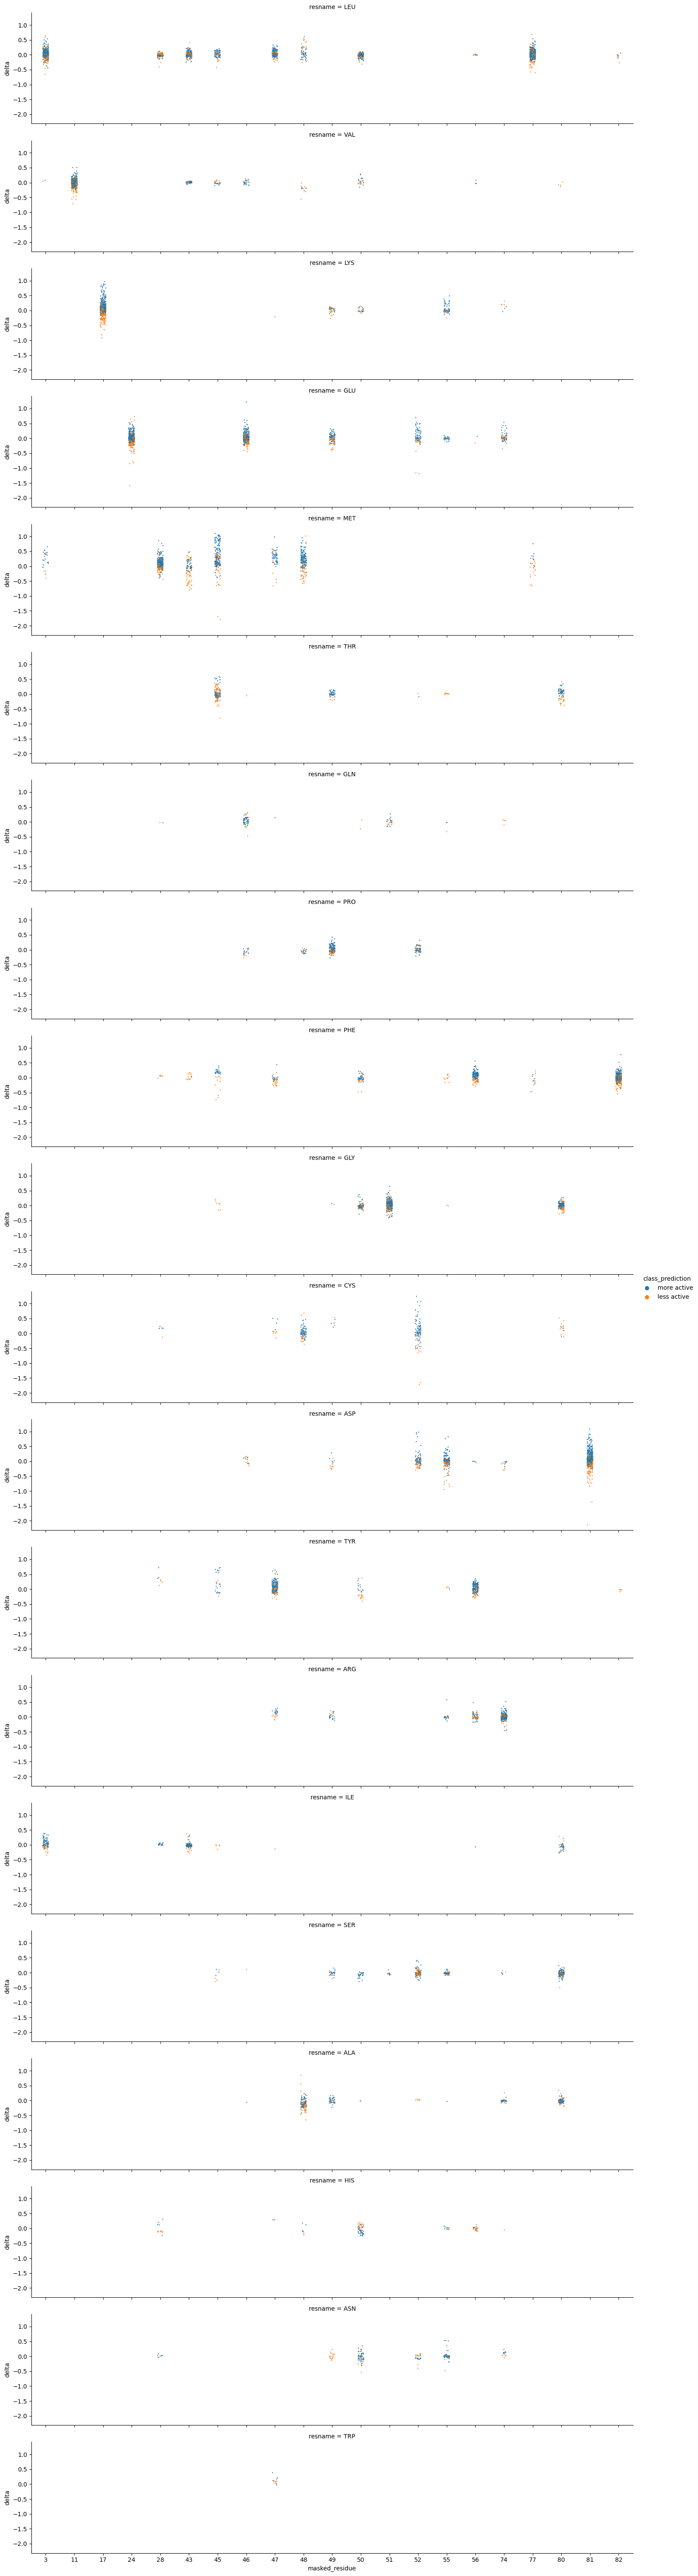

In [110]:
plt.figure(figsize=(10, 4))
sns.catplot(
    res_elim_split[res_elim_split['masked_residue'].isin(important_residues)],
    y='delta', x='masked_residue', hue='class_prediction', kind='strip', row='resname',
    sharey=True, height=3, aspect=5, s=3)

## Trends across residue types

<Figure size 1800x400 with 0 Axes>

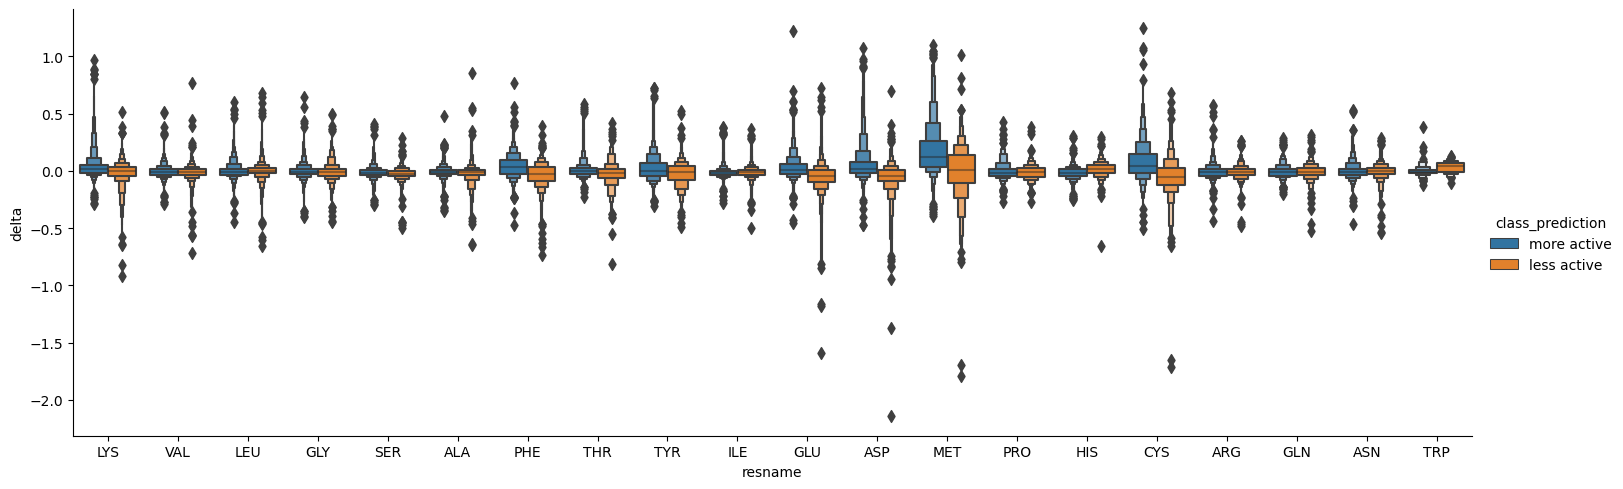

In [112]:
plt.figure(figsize=(18, 4))
sns.catplot(res_elim_split, y='delta', x='resname', hue='class_prediction', kind='boxen', aspect=3)
# plt.tight_layout()

### Variance across types

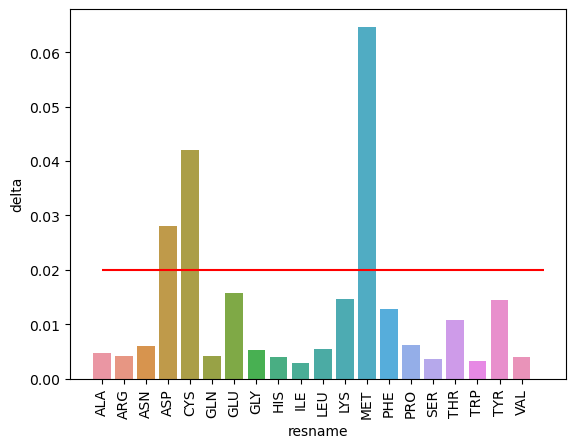

In [56]:
sns.barplot(res_elim_split.groupby('resname')[['delta']].var().reset_index(), x='resname', y='delta')
threshold = 0.02
dd = res_elim_split.groupby('resname')[['delta']].var() > threshold
important_residues = dd[dd['delta']].index
resnames = res_elim_split['resname'].unique()
plt.xticks(ticks=np.arange(len(resnames)), labels=dd.index, rotation=90);
plt.hlines([threshold], 0, len(resnames), color='r')

CYS and MET have an S atom. Maybe the model learns that?

In [57]:
important_residues

Index(['ASP', 'CYS', 'MET'], dtype='object', name='resname')

<Figure size 1000x400 with 0 Axes>

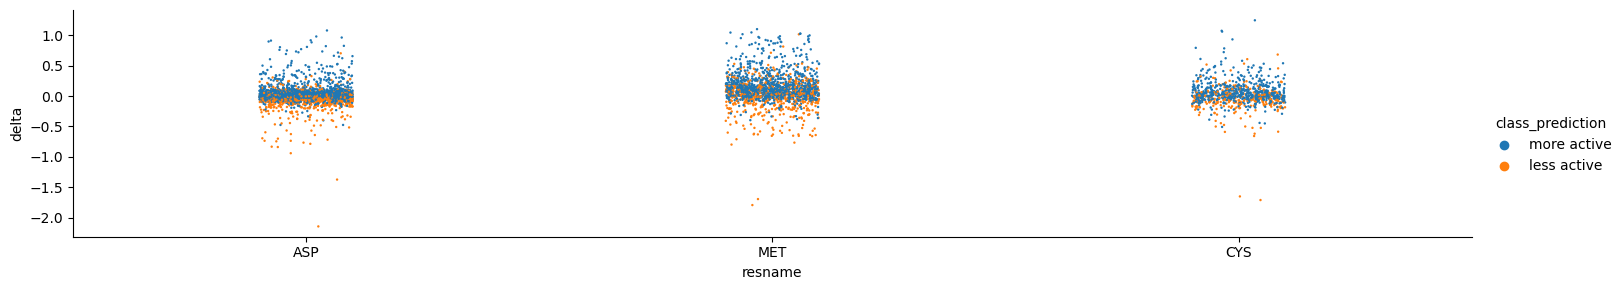

In [58]:
plt.figure(figsize=(10, 4))
sns.catplot(res_elim[res_elim['resname'].isin(important_residues)], y='delta', x='resname', hue='class_prediction', kind='strip', sharey=True, height=3, aspect=5, s=3)

# Distance-based analysis

Look at the minimal distance between ligand and each residue center.

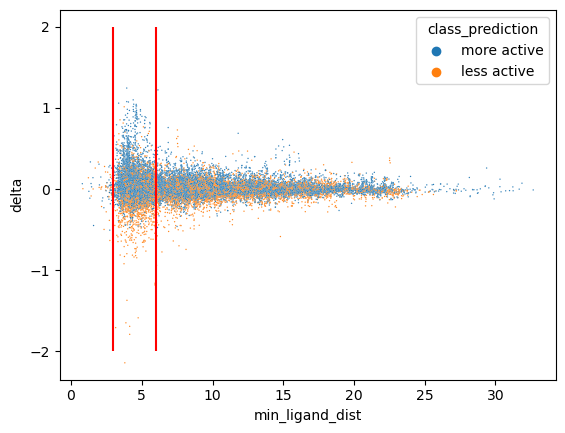

In [59]:
sns.scatterplot(res_elim, x='min_ligand_dist', y='delta', hue='class_prediction', s=1)
plt.vlines([3,6], -2, 2, color='r')

<Axes: xlabel='min_ligand_dist', ylabel='delta'>

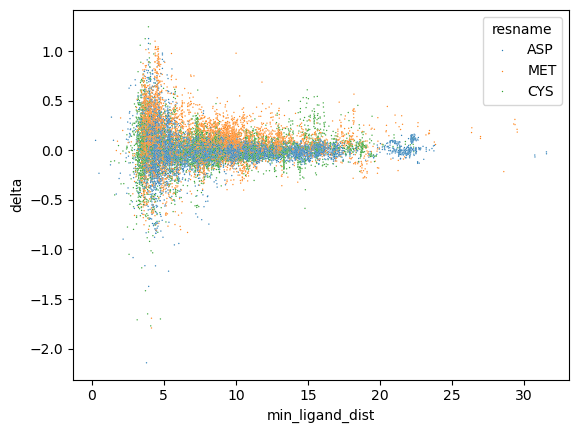

In [337]:
sns.scatterplot(res_elim[res_elim['resname'].isin(important_residues)], x='min_ligand_dist', y='delta', hue='resname', s=1)
# plt.vlines([3,6], -2, 2, color='r')

<Axes: xlabel='min_ligand_dist', ylabel='delta'>

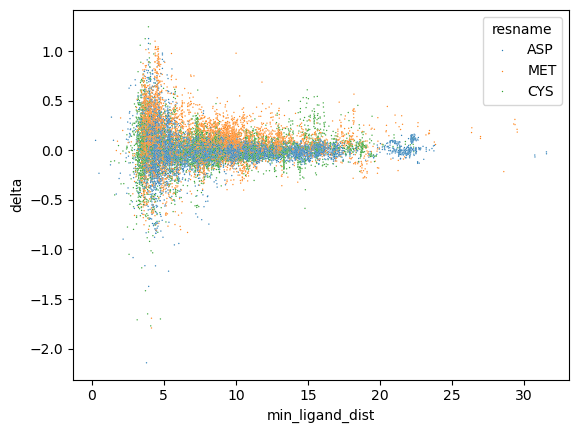

In [337]:
sns.scatterplot(res_elim[res_elim['resname'].isin(important_residues)], x='min_ligand_dist', y='delta', hue='resname', s=1)
# plt.vlines([3,6], -2, 2, color='r')

We observe a clear "band" of higher changes below 10. This could be the typical interaction distance?

In [270]:
res_elim['plausible_distance'] = (res_elim['min_ligand_dist'] < 6) & (res_elim['min_ligand_dist'] > 3)

(-0.7, 0.7)

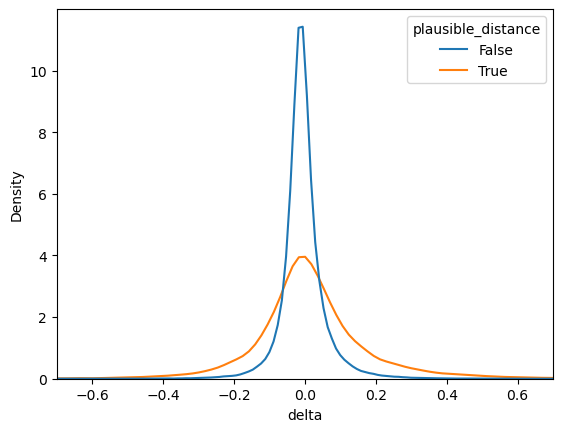

In [271]:
sns.kdeplot(res_elim, x='delta', hue='plausible_distance', common_norm=False)
plt.xlim(-.7, .7)
# plt.yscale('log')

# Comparison to general KLIFS properties

## Saltbridge
Residue 17 is associated with higher deltas. This residue plays a role in pocket stability via its possible salt-bridge with residue 24.

In [272]:
res_elim['saltbridge'] = (res_elim['salt_bridge_17_24'] > 0 ) & (res_elim['salt_bridge_17_24'] < 4)

<Axes: xlabel='reference_pred', ylabel='Density'>

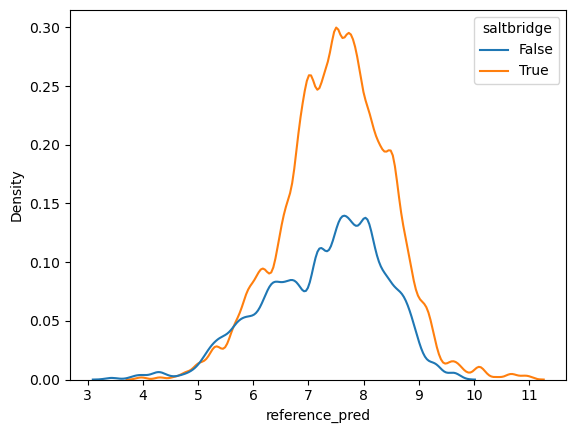

In [273]:
sns.kdeplot(res_elim, x='reference_pred', hue='saltbridge', common_norm=True)

Variances across binned salt bridge distances

/tmp/ipykernel_9960/2952384016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_variances = res_elim.groupby('binned')['salt_bridge_17_24'].var().reset_index()


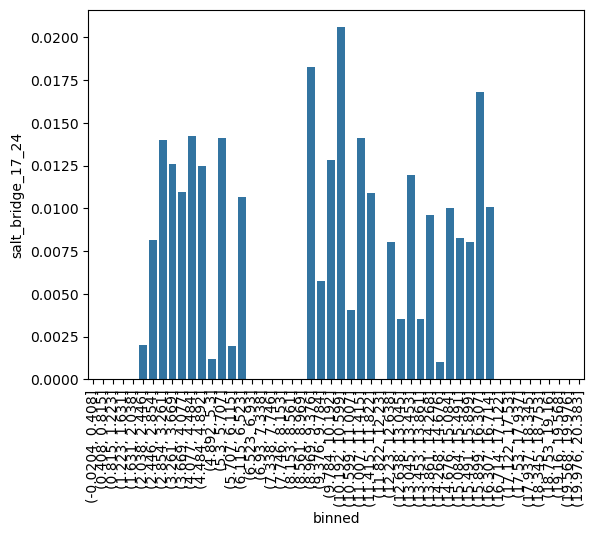

In [274]:
res_elim['binned'] = pd.cut(res_elim['salt_bridge_17_24'], bins=50)
bin_variances = res_elim.groupby('binned')['salt_bridge_17_24'].var().reset_index()
bin_variances
sns.barplot(x='binned', y='salt_bridge_17_24', data=bin_variances)
plt.xticks(rotation=90);

I don't see any trends here.

## DFG in and out

<Axes: xlabel='reference_pred', ylabel='Density'>

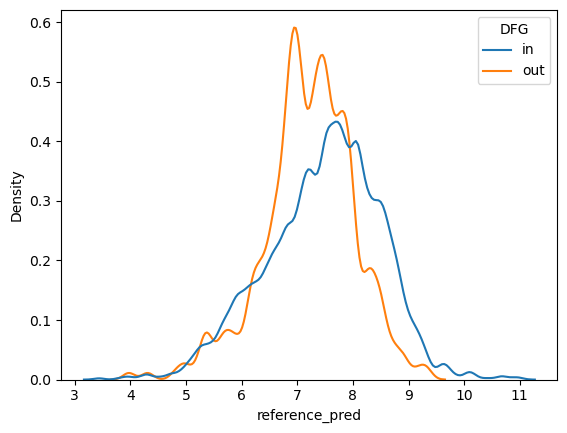

In [275]:
sns.kdeplot(res_elim[res_elim['DFG'].isin(['in', 'out'])], x='reference_pred', hue='DFG', common_norm=False)

No clear trends?

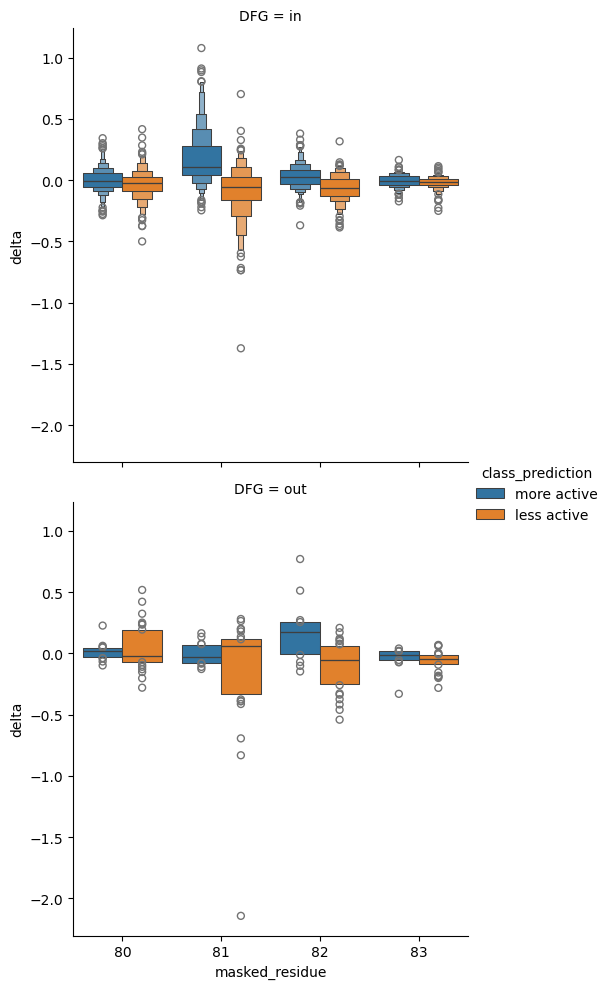

In [276]:
sns.catplot(res_elim[res_elim['DFG'].isin(['in', 'out']) & res_elim['masked_residue'].isin(range(80, 84))],
            y='delta',
            x='masked_residue',
            hue='class_prediction',
            row='DFG',
            kind='boxen', sharey=True)

## AC helix

Nothing to see here.

<Axes: xlabel='reference_pred', ylabel='Density'>

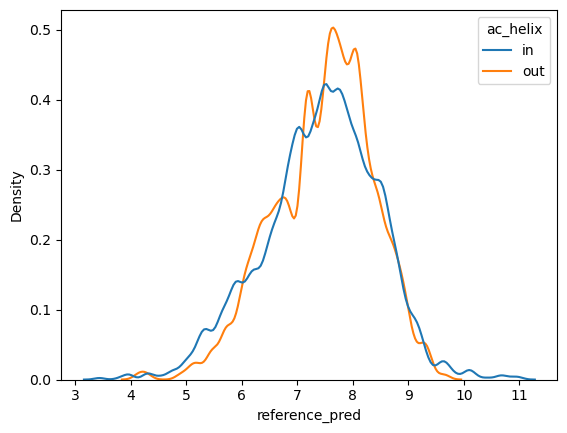

In [277]:
sns.kdeplot(res_elim[res_elim['ac_helix'] != 'na'], x='reference_pred', hue='ac_helix', common_norm=False)

## PLIP interactions

In [86]:
res_elim.set_index(['activities.activity_id', 'masked_residue'], inplace=True)

In [87]:
res_elim['plip'] = [list() for _ in range(len(res_elim))]

In [89]:
for ident, row in tqdm.tqdm(res_elim.groupby(['activities.activity_id'])):
    try:
        plip = pd.read_csv(f'../data/interaction_analysis/{ident}.csv')
    except:
        continue
    for _, row in plip.iterrows():
        if res_elim.loc[(ident, row['residue'])] is None:
            res_elim.loc[(ident, row['residue']), 'plip'] = list()
        res_elim.loc[(ident, row['residue']), 'plip'].append(row['interaction_type'])

  0%|                                                                                                                                                                                                                                                            | 0/2470 [00:00<?, ?it/s]/home/michael/.miniforge3/envs/kinodata/lib/python3.10/site-packages/tqdm/std.py:1195: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for obj in iterable:
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2470/2470 [00:09<00:00, 267.92it/s]


In [91]:
res_elim.reset_index(inplace=True)

In [92]:
res_elim['#plip'] = res_elim['plip'].map(len)

In [93]:
res_vars = res_elim.groupby(['masked_residue', 'rescode'])[['delta', 'klifs_count', '#plip']].agg(['mean', 'count', 'var']).fillna(0)

In [94]:
res_counts = res_vars.pivot_table(index='masked_residue', columns='rescode').fillna(0)

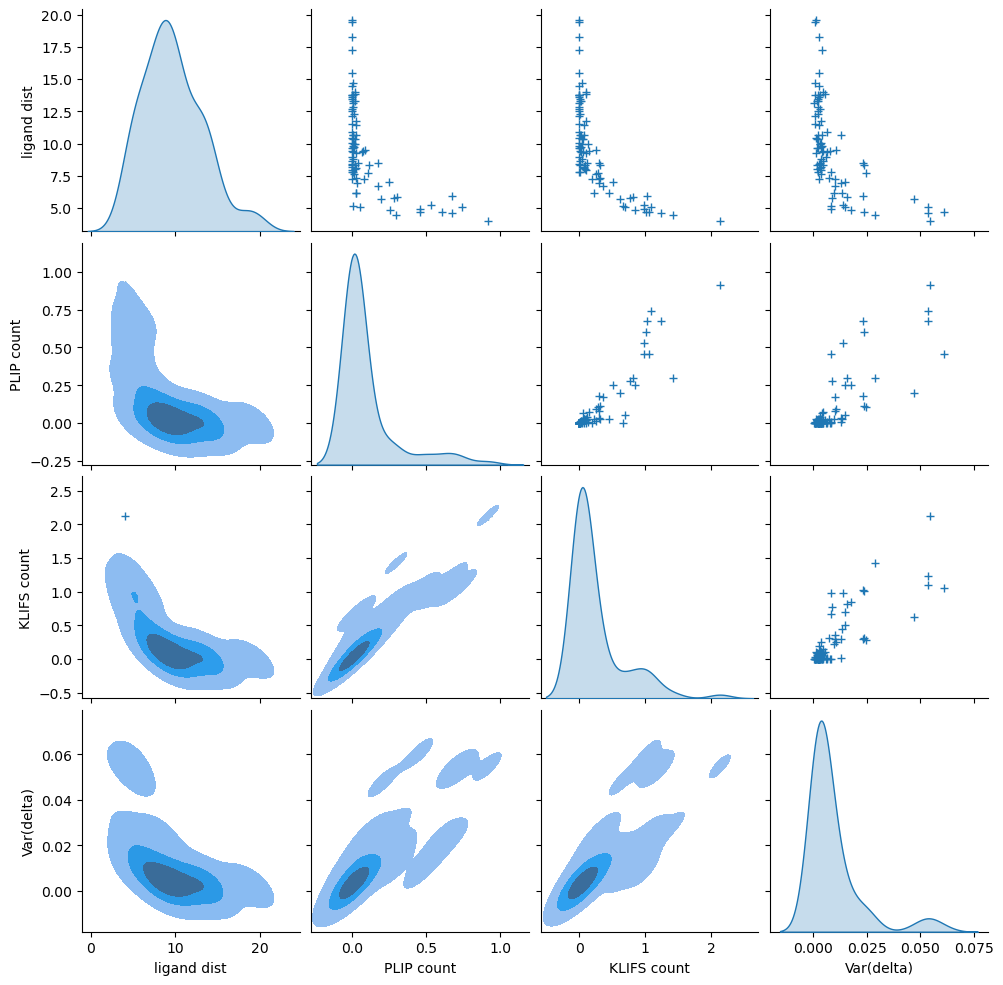

In [108]:
aggd = res_elim.groupby('masked_residue')[['min_ligand_dist', '#plip', 'delta', 'klifs_count']].agg(['mean', 'var'])
scat_dat = pd.DataFrame({
    'residue': range(1, 86),
    'ligand dist': aggd['min_ligand_dist', 'mean'].values,
    'PLIP count': aggd['#plip', 'mean'].values,
    'KLIFS count': aggd['klifs_count', 'mean'].values,
    'Var(delta)': aggd['delta', 'var'].values,
}).set_index('residue')
g = sns.pairplot(scat_dat, diag_kind="kde", plot_kws=dict(marker="+", linewidth=1))
g.map_lower(sns.kdeplot, levels=4,  fill=True, color=sns.color_palette()[0])

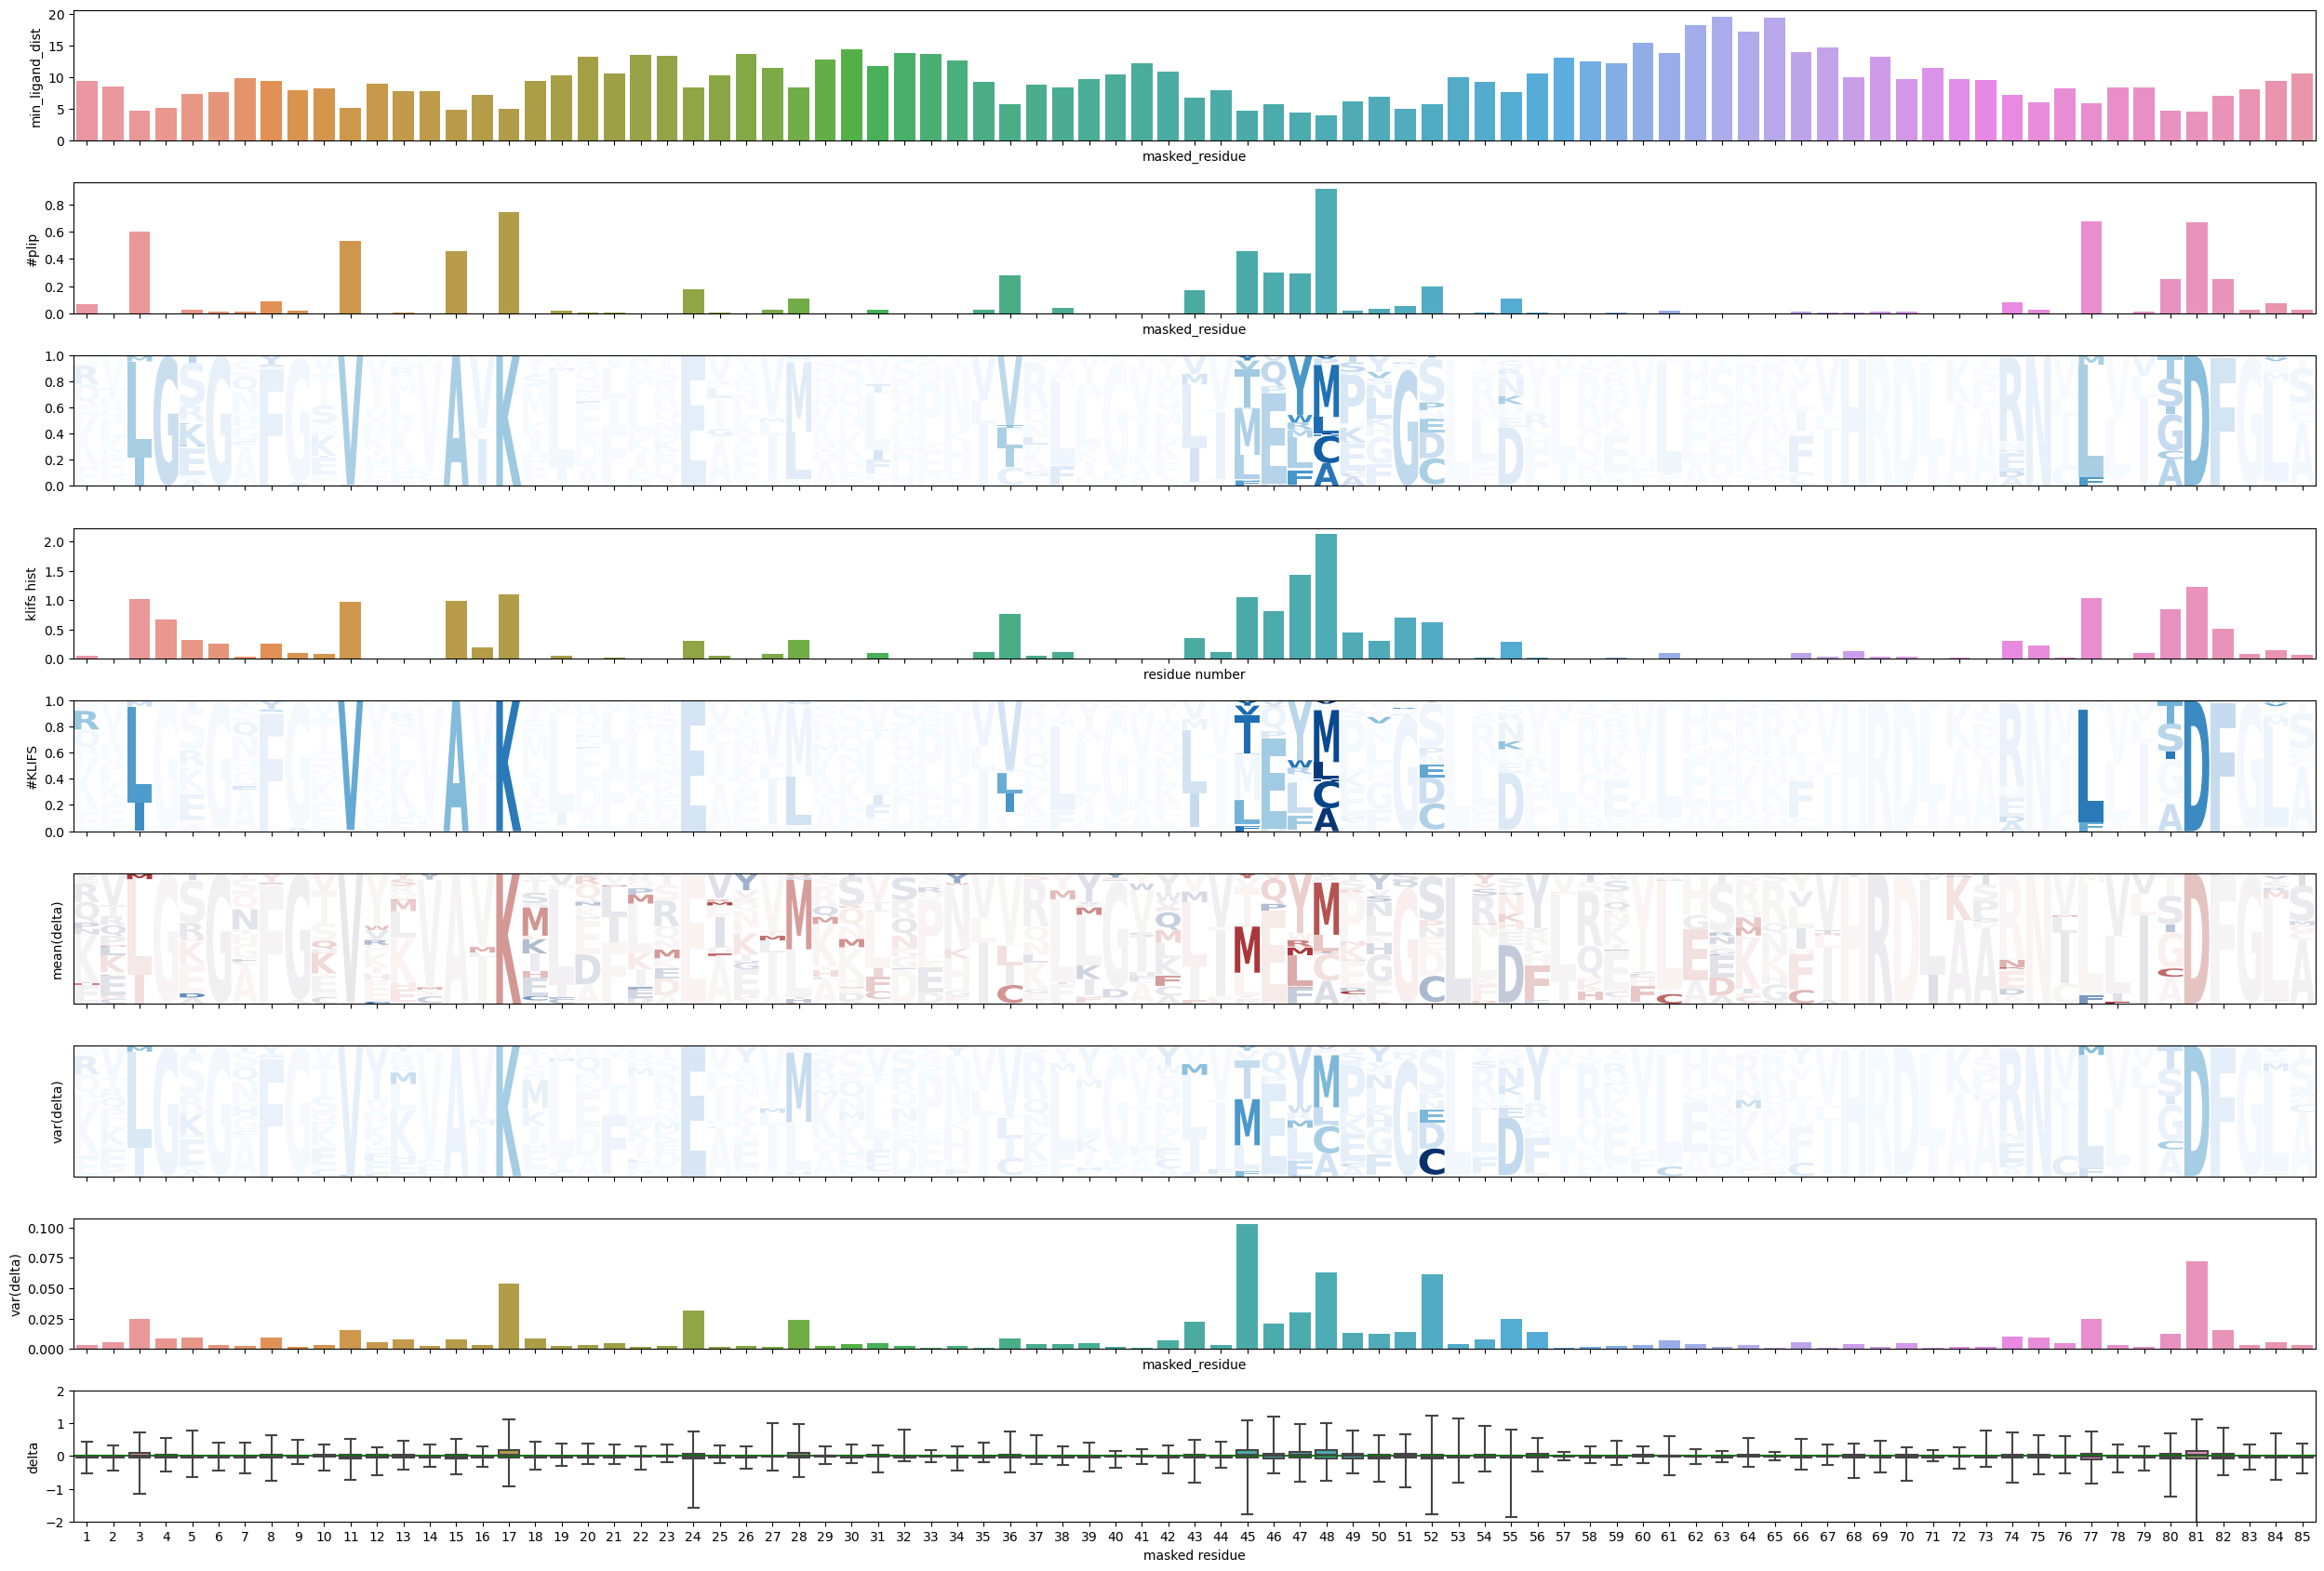

In [97]:
fig, (aaax, plipax, plipax2, aax, axk, ax0, ax, ax1, ax2) = plt.subplots(figsize=(25, 17), nrows=9, sharey=False, sharex=True)


sns.barplot(res_elim_split.groupby('masked_residue')[['delta']].var().reset_index(), x='masked_residue', y='delta', ax=ax1)
ax1.set_ylabel('var(delta)')

sns.barplot(res_elim, x='masked_residue', y='min_ligand_dist', ax=aaax, errorbar=None)

sns.barplot(res_elim, x='masked_residue', y='#plip', ax=plipax, errorbar=None)

max_cnt = res_counts['#plip', 'mean'].max().max()
cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['#plip', 'mean'][rescode] / max_cnt)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=axk, color=color)
        floor += height
axk.set_xlim(-0.5, 84.5)
axk.set_xticks([]); ax.set_yticks([])
axk.set_ylabel('#PLIP')

sns.barplot(pd.DataFrame({'klifs hist': klifs_hist / len(res_elim), 'residue number': range(1,86)}), x='residue number', y='klifs hist', ax=aax)
# klifs_interactions.pivot_table(index='residue', columns='interaction type', values='count').plot(kind='bar', stacked=True, ax=aax,legend=False)
# plt.legend(title='Interaction Types')


sns.boxplot(data=res_elim, y='delta', x='masked_residue', ax=ax2, flierprops=dict(marker='.', markersize=3), whis=(0,100))
ax2.plot([-.5,86], [0,0], c='g')
max_var = res_counts['delta', 'var'].max().max()

max_cnt = res_counts['klifs_count', 'mean'].max().max()
cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['klifs_count', 'mean'][rescode] / max_cnt)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=plipax2, color=color)
        floor += height
axk.set_xlim(-0.5, 84.5)
axk.set_xticks([]); ax.set_yticks([])
axk.set_ylabel('#KLIFS')

cp = sns.color_palette('vlag', as_cmap=True)#, sep=50, center='light')
max_mean = res_counts['delta', 'mean'].abs().max().max()
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'mean'][rescode] / max_mean  + 0.5)[:3]
        Glyph(c=rescode, p=position-1, ceiling=floor+height, floor=floor, ax=ax0, color=color)
        floor += height
ax0.set_xlim(-0.5, 84.5)
ax0.set_xticks([]); ax0.set_yticks([])
ax0.set_ylabel('mean(delta)')

cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'var'][rescode] / max_var)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=ax, color=color)
        floor += height
ax.set_xlim(-0.5, 84.5)
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('var(delta)')General remarks

Follow the existing pattern in naming posts after their date, i.e. YYYY-MM-DD-title.md.

Static data such as pictures or tools for download are located in assets/{img,data}.


ax2.set_ylim(-2,2)
ax2.set_xlabel('masked residue')
plt.xticks(np.arange(85));
plt.tight_layout()

plt.savefig('fullhouse.pdf')